In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing=pd.read_csv("cal_housing_clean.csv")
housing.info()
y=housing['medianHouseValue']
x=housing.drop('medianHouseValue',axis=1)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
scl=MinMaxScaler()
train_x=scl.fit_transform(train_x)
test_x=scl.transform(test_x)
train_y=train_y.values
test_y=test_y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [233]:
tf.reset_default_graph()
w=tf.get_variable(name="w",shape=(6,1),dtype="float64")
b=tf.get_variable(name='b',shape=(1,1),dtype="float64")

In [234]:
obs=train_x.shape[0]

In [235]:
x=tf.placeholder(name="x",shape=(None,6),dtype="float64")
y=tf.placeholder(name='y',shape=(None,),dtype="float64")

In [236]:
y_pred=tf.add(tf.matmul(x,w),b)
error=tf.reduce_sum(tf.square(tf.subtract(y_pred,tf.reshape(y,shape=(-1,1)))))
optimizer=tf.train.AdamOptimizer(learning_rate=1e-1)
train=optimizer.minimize(error)


In [237]:
sess=tf.InteractiveSession()

S:\Anaconda\envs\py36\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [238]:
batch_size=64
steps=60000
size=int(obs/batch_size)
print(size)
batches=[batch_size*i for i in range(size-1)]+[obs]
#batches=[0,obs]
print(batches)

225
[0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008, 3072, 3136, 3200, 3264, 3328, 3392, 3456, 3520, 3584, 3648, 3712, 3776, 3840, 3904, 3968, 4032, 4096, 4160, 4224, 4288, 4352, 4416, 4480, 4544, 4608, 4672, 4736, 4800, 4864, 4928, 4992, 5056, 5120, 5184, 5248, 5312, 5376, 5440, 5504, 5568, 5632, 5696, 5760, 5824, 5888, 5952, 6016, 6080, 6144, 6208, 6272, 6336, 6400, 6464, 6528, 6592, 6656, 6720, 6784, 6848, 6912, 6976, 7040, 7104, 7168, 7232, 7296, 7360, 7424, 7488, 7552, 7616, 7680, 7744, 7808, 7872, 7936, 8000, 8064, 8128, 8192, 8256, 8320, 8384, 8448, 8512, 8576, 8640, 8704, 8768, 8832, 8896, 8960, 9024, 9088, 9152, 9216, 9280, 9344, 9408, 9472, 9536, 9600, 9664, 9728, 9792, 9856, 9920, 9984, 10048, 10112, 10176, 10240, 10304, 10368, 10432, 10496, 10560, 10624, 10

In [239]:
init=tf.global_variables_initializer()
all_cost=[]
sess.run(init)
for i in range(steps):
    net_cost=0
    for epoch in range(size-1):
        x_batch=train_x[batches[epoch]:batches[epoch+1],:]
        y_batch=train_y[batches[epoch]:batches[epoch+1]]
        cost,_=sess.run([error,train],feed_dict={x:x_batch,y:y_batch})
        net_cost+=cost
    all_cost.append(net_cost)
    if i%1000 ==0:
        print("net cost per epoch = {:f}".format(net_cost))



net cost per epoch = 816241583974125.625000
net cost per epoch = 563657402492018.375000
net cost per epoch = 372778402387581.937500
net cost per epoch = 243581140065985.093750
net cost per epoch = 175866071463648.062500
net cost per epoch = 159691635689109.906250
net cost per epoch = 154338721261961.000000
net cost per epoch = 149293080179851.250000
net cost per epoch = 144514754982609.812500
net cost per epoch = 139999700978259.015625
net cost per epoch = 135740144248852.843750
net cost per epoch = 131728670966497.218750
net cost per epoch = 127958438176732.640625
net cost per epoch = 124423126544828.875000
net cost per epoch = 121116861661696.812500
net cost per epoch = 118034115831259.484375
net cost per epoch = 115169590042323.343750
net cost per epoch = 112518074849479.515625
net cost per epoch = 110074289149025.640625
net cost per epoch = 107832697323524.546875
net cost per epoch = 105787308503727.281250
net cost per epoch = 103931467219220.984375
net cost per epoch = 10225765239

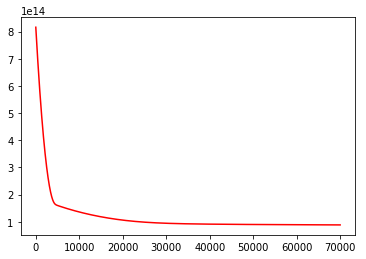

In [247]:
plt.plot(all_cost,"r")

In [248]:
weight=w.eval()
bias=b.eval()
print(weight)

[[ 102980.34944562]
 [ -33957.81261242]
 [ 187676.96749356]
 [-454349.59493312]
 [ 196651.74880405]
 [ 633768.57310164]]


In [252]:
y_predicted= np.matmul(train_x,weight)+bias
print(y_predicted.shape)
print(r2_score(train_y,y_predicted))

(14448, 1)
0.5443685899434554


In [254]:
y_predicted= np.matmul(test_x,weight)+bias
print(y_predicted.shape)
print(r2_score(test_y,y_predicted))
sess.close()

(6192, 1)
0.5317110890960915


In [5]:
from keras.models import Sequential
from keras import losses,metrics, optimizers
from keras.layers import Dense

In [12]:
def build_model(layers=[3,4],learning_rate=1e-2):
    model=Sequential()
    model.add(Dense(units=layers[0],input_shape=(6,),activation='relu'))
    model.add(Dense(units=layers[1],activation='relu'))
    model.add(Dense(units=1))
    optimizer=optimizers.Adam(lr=learning_rate)
    model.compile(loss=losses.mean_squared_error,optimizer=optimizer,metrics=[metrics.mae])
    return model

In [23]:
model=build_model(layers=[10,10],learning_rate=1e-1)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [24]:
history=model.fit(train_x,train_y,epochs=1000,validation_split=0.2)

Train on 11558 samples, validate on 2890 samples
Epoch 1/1000
11558/11558 [==============================] - 1s 49us/step - loss: 20761904000.0664 - mean_absolute_error: 108750.0054 - val_loss: 9798854034.1592 - val_mean_absolute_error: 76671.2230
Epoch 2/1000
11558/11558 [==============================] - 0s 30us/step - loss: 7979902285.6550 - mean_absolute_error: 70302.2106 - val_loss: 7000370931.7758 - val_mean_absolute_error: 63556.9362
Epoch 3/1000
11558/11558 [==============================] - 0s 28us/step - loss: 6452418571.1189 - mean_absolute_error: 61026.5516 - val_loss: 6421885770.0540 - val_mean_absolute_error: 60318.0402
Epoch 4/1000
11558/11558 [==============================] - 0s 28us/step - loss: 6223714276.1807 - mean_absolute_error: 59157.6293 - val_loss: 6288440211.3993 - val_mean_absolute_error: 57954.9195
Epoch 5/1000
11558/11558 [==============================] - 0s 29us/step - loss: 6123753544.3392 - mean_absolute_error: 58508.3155 - val_loss: 6211121691.9917 - 

11558/11558 [==============================] - 0s 29us/step - loss: 5577078012.4118 - mean_absolute_error: 55174.6503 - val_loss: 5673870850.1260 - val_mean_absolute_error: 55058.7419
Epoch 43/1000
11558/11558 [==============================] - 0s 29us/step - loss: 5575548504.9953 - mean_absolute_error: 55248.6481 - val_loss: 5707027919.4574 - val_mean_absolute_error: 55965.8173
Epoch 44/1000
11558/11558 [==============================] - 0s 33us/step - loss: 5566553740.4035 - mean_absolute_error: 55165.9800 - val_loss: 5682671613.5197 - val_mean_absolute_error: 54123.0802
Epoch 45/1000
11558/11558 [==============================] - 0s 31us/step - loss: 5578945525.0140 - mean_absolute_error: 55244.5466 - val_loss: 5679619254.4775 - val_mean_absolute_error: 55596.0149
Epoch 46/1000
11558/11558 [==============================] - 0s 28us/step - loss: 5562424321.2847 - mean_absolute_error: 55253.4907 - val_loss: 5659967498.6298 - val_mean_absolute_error: 55094.3101
Epoch 47/1000
11558/1155

11558/11558 [==============================] - 0s 26us/step - loss: 5487479871.9668 - mean_absolute_error: 54751.5096 - val_loss: 5610894840.2048 - val_mean_absolute_error: 54497.4932
Epoch 84/1000
11558/11558 [==============================] - 0s 29us/step - loss: 5503287646.4883 - mean_absolute_error: 54929.0243 - val_loss: 5626184706.1260 - val_mean_absolute_error: 54273.5736
Epoch 85/1000
11558/11558 [==============================] - 0s 28us/step - loss: 5497066685.2424 - mean_absolute_error: 54756.7431 - val_loss: 5611831241.7882 - val_mean_absolute_error: 54599.1352
Epoch 86/1000
11558/11558 [==============================] - 0s 29us/step - loss: 5483327072.3710 - mean_absolute_error: 54770.9399 - val_loss: 5848054492.7446 - val_mean_absolute_error: 54410.3989
Epoch 87/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5518556455.7799 - mean_absolute_error: 54972.6407 - val_loss: 5590650533.1156 - val_mean_absolute_error: 54729.4544
Epoch 88/1000
11558/1155

11558/11558 [==============================] - 0s 35us/step - loss: 5462411422.8538 - mean_absolute_error: 54561.7890 - val_loss: 5566072322.6574 - val_mean_absolute_error: 55062.7587
Epoch 125/1000
11558/11558 [==============================] - 0s 34us/step - loss: 5462680567.4947 - mean_absolute_error: 54697.9222 - val_loss: 5665064157.8076 - val_mean_absolute_error: 53713.3642
Epoch 126/1000
11558/11558 [==============================] - 0s 32us/step - loss: 5460968467.0483 - mean_absolute_error: 54570.4493 - val_loss: 5545224589.3758 - val_mean_absolute_error: 54354.7849
Epoch 127/1000
11558/11558 [==============================] - 0s 30us/step - loss: 5453999350.2101 - mean_absolute_error: 54551.0876 - val_loss: 5547301907.8422 - val_mean_absolute_error: 54202.5412
Epoch 128/1000
11558/11558 [==============================] - 0s 33us/step - loss: 5449969765.7089 - mean_absolute_error: 54527.3909 - val_loss: 5572917576.6367 - val_mean_absolute_error: 53868.2137
Epoch 129/1000
11558

11558/11558 [==============================] - 0s 27us/step - loss: 5381097753.1171 - mean_absolute_error: 54196.2509 - val_loss: 5473795413.0381 - val_mean_absolute_error: 53811.4668
Epoch 166/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5363218540.6195 - mean_absolute_error: 54004.9112 - val_loss: 5749807799.8948 - val_mean_absolute_error: 57708.7486
Epoch 167/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5399490625.0299 - mean_absolute_error: 54388.3861 - val_loss: 5479340637.1875 - val_mean_absolute_error: 54144.4844
Epoch 168/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5380457347.1895 - mean_absolute_error: 54160.5558 - val_loss: 5476200706.6574 - val_mean_absolute_error: 54511.4094
Epoch 169/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5412450124.1156 - mean_absolute_error: 54325.4332 - val_loss: 5671472841.2567 - val_mean_absolute_error: 53568.0584
Epoch 170/1000
11558

11558/11558 [==============================] - 0s 30us/step - loss: 5378058721.1462 - mean_absolute_error: 54271.0758 - val_loss: 5514281303.6955 - val_mean_absolute_error: 55133.5444
Epoch 207/1000
11558/11558 [==============================] - 0s 30us/step - loss: 5351949808.3184 - mean_absolute_error: 54010.5396 - val_loss: 5502206388.7059 - val_mean_absolute_error: 53492.9433
Epoch 208/1000
11558/11558 [==============================] - 0s 30us/step - loss: 5366612794.8282 - mean_absolute_error: 54000.0353 - val_loss: 5452273555.9308 - val_mean_absolute_error: 53921.1019
Epoch 209/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5354654374.5838 - mean_absolute_error: 54030.7411 - val_loss: 5483590640.7640 - val_mean_absolute_error: 53757.8828
Epoch 210/1000
11558/11558 [==============================] - 0s 30us/step - loss: 5364166128.8721 - mean_absolute_error: 53942.9082 - val_loss: 5478657517.5751 - val_mean_absolute_error: 54749.9202
Epoch 211/1000
11558

11558/11558 [==============================] - 0s 29us/step - loss: 5368588962.9292 - mean_absolute_error: 53974.8887 - val_loss: 5445904093.6305 - val_mean_absolute_error: 53612.9835
Epoch 248/1000
11558/11558 [==============================] - 0s 33us/step - loss: 5335851448.8569 - mean_absolute_error: 53950.5876 - val_loss: 5540327995.1723 - val_mean_absolute_error: 53182.7785
Epoch 249/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5343323465.8010 - mean_absolute_error: 53944.7040 - val_loss: 5440680969.0353 - val_mean_absolute_error: 53843.1658
Epoch 250/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5346646448.7060 - mean_absolute_error: 53814.6557 - val_loss: 5533849503.2692 - val_mean_absolute_error: 53418.2536
Epoch 251/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5348589284.4021 - mean_absolute_error: 54017.4719 - val_loss: 5451333653.2595 - val_mean_absolute_error: 54021.1709
Epoch 252/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5341220633.0286 - mean_absolute_error: 53861.0948 - val_loss: 5439899201.3730 - val_mean_absolute_error: 53665.2240
Epoch 289/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5329992019.7238 - mean_absolute_error: 53728.2953 - val_loss: 5561513456.9412 - val_mean_absolute_error: 53160.8780
Epoch 290/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5333824122.5735 - mean_absolute_error: 53798.9965 - val_loss: 5527823468.6007 - val_mean_absolute_error: 53230.4425
Epoch 291/1000
11558/11558 [==============================] - 0s 28us/step - loss: 5336722792.9870 - mean_absolute_error: 53834.3978 - val_loss: 5434616906.5855 - val_mean_absolute_error: 53897.6785
Epoch 292/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5321758698.7147 - mean_absolute_error: 53723.5265 - val_loss: 5625023929.4893 - val_mean_absolute_error: 53410.2323
Epoch 293/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5317539817.2750 - mean_absolute_error: 53647.4764 - val_loss: 5450921871.8561 - val_mean_absolute_error: 52881.6419
Epoch 330/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5316084278.9299 - mean_absolute_error: 53624.3962 - val_loss: 5413881653.5031 - val_mean_absolute_error: 53930.2002
Epoch 331/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5324852519.3812 - mean_absolute_error: 53686.0084 - val_loss: 5435833331.2443 - val_mean_absolute_error: 54474.8931
Epoch 332/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5312556090.2080 - mean_absolute_error: 53662.8805 - val_loss: 5453413285.8242 - val_mean_absolute_error: 54478.3544
Epoch 333/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5314953469.0320 - mean_absolute_error: 53667.7303 - val_loss: 5403379184.4097 - val_mean_absolute_error: 53553.3375
Epoch 334/1000
11558

11558/11558 [==============================] - 0s 28us/step - loss: 5281138678.2322 - mean_absolute_error: 53535.1450 - val_loss: 5410320768.0886 - val_mean_absolute_error: 52744.6048
Epoch 371/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5298654934.2488 - mean_absolute_error: 53449.7107 - val_loss: 5408855512.1384 - val_mean_absolute_error: 53761.0762
Epoch 372/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5295685572.4631 - mean_absolute_error: 53463.9674 - val_loss: 5402957274.9730 - val_mean_absolute_error: 53944.3592
Epoch 373/1000
11558/11558 [==============================] - 0s 30us/step - loss: 5296668793.4217 - mean_absolute_error: 53560.0389 - val_loss: 5437095617.4616 - val_mean_absolute_error: 52955.4863
Epoch 374/1000
11558/11558 [==============================] - 0s 29us/step - loss: 5298888027.7861 - mean_absolute_error: 53467.8869 - val_loss: 5472303799.3633 - val_mean_absolute_error: 53289.3655
Epoch 375/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5284914634.9749 - mean_absolute_error: 53294.4037 - val_loss: 5456422914.1260 - val_mean_absolute_error: 53245.8180
Epoch 412/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5293075867.5536 - mean_absolute_error: 53533.9179 - val_loss: 5485049472.2657 - val_mean_absolute_error: 52801.2186
Epoch 413/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5293689909.6010 - mean_absolute_error: 53437.6706 - val_loss: 5392121580.3349 - val_mean_absolute_error: 53589.1004
Epoch 414/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5309588459.7557 - mean_absolute_error: 53467.7581 - val_loss: 5385539336.8581 - val_mean_absolute_error: 53709.8609
Epoch 415/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5280249076.3495 - mean_absolute_error: 53362.6914 - val_loss: 5393734124.1578 - val_mean_absolute_error: 53864.1967
Epoch 416/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5273377815.2123 - mean_absolute_error: 53373.4474 - val_loss: 5442869746.1813 - val_mean_absolute_error: 52918.2216
Epoch 453/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5293734747.2988 - mean_absolute_error: 53446.8016 - val_loss: 5422295107.3218 - val_mean_absolute_error: 52683.0591
Epoch 454/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5286862265.8093 - mean_absolute_error: 53309.7232 - val_loss: 5367626041.2235 - val_mean_absolute_error: 53238.2215
Epoch 455/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5278415777.0687 - mean_absolute_error: 53246.9400 - val_loss: 5388051800.2270 - val_mean_absolute_error: 53812.6892
Epoch 456/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5288988262.8607 - mean_absolute_error: 53426.8561 - val_loss: 5400464030.0291 - val_mean_absolute_error: 52923.9142
Epoch 457/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5273493974.8690 - mean_absolute_error: 53255.9026 - val_loss: 5598139904.3543 - val_mean_absolute_error: 52858.8460
Epoch 494/1000
11558/11558 [==============================] - 0s 25us/step - loss: 5269098937.6543 - mean_absolute_error: 53197.8412 - val_loss: 5387530765.9958 - val_mean_absolute_error: 53835.1728
Epoch 495/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5264678287.0393 - mean_absolute_error: 53146.2056 - val_loss: 5374555866.9730 - val_mean_absolute_error: 53308.0653
Epoch 496/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5267147049.0867 - mean_absolute_error: 53243.3978 - val_loss: 5381059722.5412 - val_mean_absolute_error: 52888.9311
Epoch 497/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5260104425.0978 - mean_absolute_error: 53204.0770 - val_loss: 5598961361.2291 - val_mean_absolute_error: 52983.3356
Epoch 498/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5257493695.9668 - mean_absolute_error: 53245.0043 - val_loss: 5542138086.6657 - val_mean_absolute_error: 52613.7204
Epoch 535/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5272749859.6601 - mean_absolute_error: 53285.6795 - val_loss: 5374921826.5024 - val_mean_absolute_error: 53057.1269
Epoch 536/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5258715936.0277 - mean_absolute_error: 53086.2159 - val_loss: 5476174339.5433 - val_mean_absolute_error: 54887.8260
Epoch 537/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5265324121.6598 - mean_absolute_error: 53211.4646 - val_loss: 5365701963.8256 - val_mean_absolute_error: 53025.8623
Epoch 538/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5268328196.5627 - mean_absolute_error: 53238.6036 - val_loss: 5440054053.0270 - val_mean_absolute_error: 52674.5312
Epoch 539/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5295193427.1480 - mean_absolute_error: 53377.8754 - val_loss: 5404758185.0131 - val_mean_absolute_error: 52568.9897
Epoch 576/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5274585060.2914 - mean_absolute_error: 53153.2040 - val_loss: 5372271078.4886 - val_mean_absolute_error: 53159.8165
Epoch 577/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5256935060.0893 - mean_absolute_error: 53126.4031 - val_loss: 5412567908.9827 - val_mean_absolute_error: 53190.7937
Epoch 578/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5278488224.4485 - mean_absolute_error: 53436.5304 - val_loss: 5377252156.7668 - val_mean_absolute_error: 52670.5904
Epoch 579/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5261549032.5219 - mean_absolute_error: 53196.7048 - val_loss: 5360527605.5474 - val_mean_absolute_error: 53228.7360
Epoch 580/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5258079484.7330 - mean_absolute_error: 53148.1551 - val_loss: 5392606491.6374 - val_mean_absolute_error: 52849.5681
Epoch 617/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5263907289.1504 - mean_absolute_error: 53148.0317 - val_loss: 5351690131.9308 - val_mean_absolute_error: 53037.2992
Epoch 618/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5265965831.6415 - mean_absolute_error: 53139.1776 - val_loss: 5484821266.9564 - val_mean_absolute_error: 52909.3694
Epoch 619/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5257379170.1208 - mean_absolute_error: 53157.2869 - val_loss: 5359751371.0284 - val_mean_absolute_error: 53400.8884
Epoch 620/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5275905462.6420 - mean_absolute_error: 53188.3113 - val_loss: 5403182678.2782 - val_mean_absolute_error: 52817.7527
Epoch 621/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5257601010.3340 - mean_absolute_error: 53095.8225 - val_loss: 5428819687.5516 - val_mean_absolute_error: 52599.5810
Epoch 658/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5268569660.6001 - mean_absolute_error: 53176.9287 - val_loss: 5367964354.7017 - val_mean_absolute_error: 53496.8942
Epoch 659/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5263446834.7880 - mean_absolute_error: 53214.8177 - val_loss: 5410548142.5052 - val_mean_absolute_error: 52748.1106
Epoch 660/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5263910419.6020 - mean_absolute_error: 53191.4808 - val_loss: 5418880339.0893 - val_mean_absolute_error: 54322.1989
Epoch 661/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5274539794.3838 - mean_absolute_error: 53202.2620 - val_loss: 5655466103.5848 - val_mean_absolute_error: 53187.3084
Epoch 662/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5259278544.3350 - mean_absolute_error: 53163.8207 - val_loss: 5404454571.8478 - val_mean_absolute_error: 52576.7520
Epoch 699/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5263767329.0022 - mean_absolute_error: 53153.9800 - val_loss: 5386320313.8436 - val_mean_absolute_error: 53896.2196
Epoch 700/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5272922615.5833 - mean_absolute_error: 53291.3437 - val_loss: 5407759643.1059 - val_mean_absolute_error: 52894.0922
Epoch 701/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5255401216.5316 - mean_absolute_error: 53113.4906 - val_loss: 5590148121.1571 - val_mean_absolute_error: 52845.6074
Epoch 702/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5256998448.7614 - mean_absolute_error: 53147.4060 - val_loss: 5388680285.0104 - val_mean_absolute_error: 53116.8686
Epoch 703/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5267412925.5304 - mean_absolute_error: 53253.0056 - val_loss: 5435345112.6699 - val_mean_absolute_error: 52606.7666
Epoch 740/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5267928771.9426 - mean_absolute_error: 53115.8927 - val_loss: 5474314164.8830 - val_mean_absolute_error: 52885.6194
Epoch 741/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5273599701.0528 - mean_absolute_error: 53251.1381 - val_loss: 5362382104.4484 - val_mean_absolute_error: 53053.1363
Epoch 742/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5257248009.0812 - mean_absolute_error: 53214.9279 - val_loss: 5520922859.6263 - val_mean_absolute_error: 52504.0016
Epoch 743/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5257954494.5271 - mean_absolute_error: 53149.2792 - val_loss: 5362545605.5363 - val_mean_absolute_error: 52988.6895
Epoch 744/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5255965648.8223 - mean_absolute_error: 53109.2786 - val_loss: 5376450673.3841 - val_mean_absolute_error: 52720.8002
Epoch 781/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5267660465.5920 - mean_absolute_error: 53149.9617 - val_loss: 5468663770.4415 - val_mean_absolute_error: 52946.0501
Epoch 782/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5259434183.8740 - mean_absolute_error: 53193.9099 - val_loss: 5381142320.0111 - val_mean_absolute_error: 52665.7943
Epoch 783/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5248504381.7962 - mean_absolute_error: 53074.6086 - val_loss: 5370751252.3737 - val_mean_absolute_error: 52924.0653
Epoch 784/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5260594939.4151 - mean_absolute_error: 53139.7020 - val_loss: 5399321060.8941 - val_mean_absolute_error: 52678.5911
Epoch 785/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5265274782.2779 - mean_absolute_error: 53242.3881 - val_loss: 5410249399.7176 - val_mean_absolute_error: 52680.6763
Epoch 822/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5254147650.9569 - mean_absolute_error: 53172.3859 - val_loss: 5436917703.3080 - val_mean_absolute_error: 52563.5274
Epoch 823/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5254600376.4582 - mean_absolute_error: 53022.1015 - val_loss: 5417534636.2021 - val_mean_absolute_error: 54417.8158
Epoch 824/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5260900216.8237 - mean_absolute_error: 53187.0298 - val_loss: 5363464576.7972 - val_mean_absolute_error: 52816.8946
Epoch 825/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5257473225.6681 - mean_absolute_error: 53142.1235 - val_loss: 5367535212.4235 - val_mean_absolute_error: 53230.9228
Epoch 826/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5260833020.0574 - mean_absolute_error: 53059.1038 - val_loss: 5495239173.3149 - val_mean_absolute_error: 52802.5103
Epoch 863/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5273784225.9990 - mean_absolute_error: 53190.8957 - val_loss: 5378088973.8187 - val_mean_absolute_error: 53962.8572
Epoch 864/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5269449651.0095 - mean_absolute_error: 53128.0888 - val_loss: 5365883863.2526 - val_mean_absolute_error: 53227.7176
Epoch 865/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5254702924.4811 - mean_absolute_error: 53177.9924 - val_loss: 5520810252.2242 - val_mean_absolute_error: 52843.4403
Epoch 866/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5255582067.3971 - mean_absolute_error: 53073.3162 - val_loss: 5353107375.5682 - val_mean_absolute_error: 53228.9957
Epoch 867/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5244456385.0078 - mean_absolute_error: 52996.5786 - val_loss: 5387124143.7453 - val_mean_absolute_error: 52913.2052
Epoch 904/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5247913295.6041 - mean_absolute_error: 53073.9083 - val_loss: 5464095137.7495 - val_mean_absolute_error: 54788.2172
Epoch 905/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5260556904.1011 - mean_absolute_error: 53227.4813 - val_loss: 5362038540.5785 - val_mean_absolute_error: 52889.7318
Epoch 906/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5249144506.4073 - mean_absolute_error: 53012.3942 - val_loss: 5395566318.1066 - val_mean_absolute_error: 54176.1360
Epoch 907/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5253847139.1396 - mean_absolute_error: 53167.1896 - val_loss: 5370408122.5522 - val_mean_absolute_error: 52696.5590
Epoch 908/1000
11558

11558/11558 [==============================] - 0s 26us/step - loss: 5263691950.1367 - mean_absolute_error: 53282.2791 - val_loss: 5450534020.6948 - val_mean_absolute_error: 52630.5644
Epoch 945/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5247992082.9375 - mean_absolute_error: 52972.6954 - val_loss: 5356830474.4526 - val_mean_absolute_error: 53621.7960
Epoch 946/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5248308412.5337 - mean_absolute_error: 53159.9062 - val_loss: 5396089748.4623 - val_mean_absolute_error: 52721.0462
Epoch 947/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5256756536.9233 - mean_absolute_error: 53074.3971 - val_loss: 5382698128.5647 - val_mean_absolute_error: 52787.8733
Epoch 948/1000
11558/11558 [==============================] - 0s 26us/step - loss: 5255416863.8837 - mean_absolute_error: 53088.5568 - val_loss: 5389875649.8159 - val_mean_absolute_error: 54088.2018
Epoch 949/1000
11558

11558/11558 [==============================] - 0s 29us/step - loss: 5266011131.9246 - mean_absolute_error: 53089.2395 - val_loss: 5370314837.3924 - val_mean_absolute_error: 52958.3492
Epoch 986/1000
11558/11558 [==============================] - 0s 27us/step - loss: 5266336165.0112 - mean_absolute_error: 53232.5019 - val_loss: 5352881852.5010 - val_mean_absolute_error: 52872.0090
Epoch 987/1000
11558/11558 [==============================] - 0s 28us/step - loss: 5258171970.9791 - mean_absolute_error: 53071.8255 - val_loss: 5360700996.7391 - val_mean_absolute_error: 53006.8907
Epoch 988/1000
11558/11558 [==============================] - 0s 32us/step - loss: 5251021062.5119 - mean_absolute_error: 53042.8566 - val_loss: 5361940891.0173 - val_mean_absolute_error: 53571.3838
Epoch 989/1000
11558/11558 [==============================] - 0s 35us/step - loss: 5255677916.5613 - mean_absolute_error: 53201.5897 - val_loss: 5356670829.6637 - val_mean_absolute_error: 53197.5762
Epoch 990/1000
11558

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [26]:
def plot_history(history):
    plt.figure()
    plt.xlabel("epochs")
    plt.ylabel("mse")
    plt.plot(history.epoch,np.sqrt(history.history['loss']),label='Train loss')
    plt.plot(history.epoch,np.sqrt(history.history['val_loss']),label="Val loss")
    plt.legend()
    

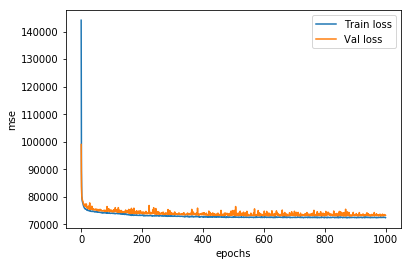

In [27]:
plot_history(history)

In [264]:
model=Sequential()
model.add(Dense(units=5,input_dim=6,activation='relu'))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=optimizers.Adam(lr=1e-2),loss=losses.mean_squared_error,metrics=[metrics.mae])
model.fit(train_x,train_y,epochs=1000,batch_size=64)

Epoch 1/1000
14448/14448 [==============================] - 0s 22us/step - loss: 56457890978.1617 - mean_absolute_error: 207542.5615
Epoch 2/1000
14448/14448 [==============================] - 0s 14us/step - loss: 55469788458.2414 - mean_absolute_error: 205228.8488
Epoch 3/1000
14448/14448 [==============================] - 0s 14us/step - loss: 51779481436.7043 - mean_absolute_error: 196325.2064
Epoch 4/1000
14448/14448 [==============================] - 0s 14us/step - loss: 44637488668.9169 - mean_absolute_error: 177828.8617
Epoch 5/1000
14448/14448 [==============================] - 0s 14us/step - loss: 34910078429.4131 - mean_absolute_error: 149450.1370
Epoch 6/1000
14448/14448 [==============================] - 0s 14us/step - loss: 24889106763.1274 - mean_absolute_error: 117790.3622
Epoch 7/1000
14448/14448 [==============================] - 0s 14us/step - loss: 17208471713.0277 - mean_absolute_error: 94012.4596
Epoch 8/1000
14448/14448 [==============================] - 0s 14us/st

Epoch 124/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5980882733.6434 - mean_absolute_error: 57466.4105
Epoch 125/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5976810173.3776 - mean_absolute_error: 57453.6677
Epoch 126/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5972290147.2248 - mean_absolute_error: 57364.7860
Epoch 127/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5968415094.7863 - mean_absolute_error: 57345.2545
Epoch 128/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5965664819.0299 - mean_absolute_error: 57397.4667
Epoch 129/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5962070014.2990 - mean_absolute_error: 57238.9116
Epoch 130/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5959758348.4740 - mean_absolute_error: 57377.2592
Epoch 131/1000
14448/14448 [==============================] - 0s 14us

14448/14448 [==============================] - 0s 15us/step - loss: 5717852876.1196 - mean_absolute_error: 55925.6168
Epoch 247/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5714230722.7641 - mean_absolute_error: 55831.9561
Epoch 248/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5717597428.3765 - mean_absolute_error: 55970.5529
Epoch 249/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5716293260.6157 - mean_absolute_error: 55920.4434
Epoch 250/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5714357437.9446 - mean_absolute_error: 55913.0574
Epoch 251/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5714287334.7685 - mean_absolute_error: 55898.7522
Epoch 252/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5712699812.1462 - mean_absolute_error: 55875.8881
Epoch 253/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5685556894.4762 - mean_absolute_error: 55771.4770
Epoch 369/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685124327.3355 - mean_absolute_error: 55737.3149
Epoch 370/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685361296.3012 - mean_absolute_error: 55749.9002
Epoch 371/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685852055.6722 - mean_absolute_error: 55750.7039
Epoch 372/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5685342027.1274 - mean_absolute_error: 55760.8266
Epoch 373/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5685127923.8095 - mean_absolute_error: 55715.3828
Epoch 374/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684593181.4839 - mean_absolute_error: 55719.4750
Epoch 375/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683794941.1650 - mean_absolute_error: 55707.0624
Epoch 491/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5683067108.5006 - mean_absolute_error: 55800.7908
Epoch 492/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684265552.5138 - mean_absolute_error: 55719.1893
Epoch 493/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684676279.7076 - mean_absolute_error: 55728.5694
Epoch 494/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685212222.0864 - mean_absolute_error: 55721.6693
Epoch 495/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682658859.0919 - mean_absolute_error: 55690.0246
Epoch 496/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684950368.1063 - mean_absolute_error: 55756.2654
Epoch 497/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 15us/step - loss: 5682849803.9070 - mean_absolute_error: 55740.2870
Epoch 613/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683270693.9889 - mean_absolute_error: 55706.2742
Epoch 614/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684034822.5205 - mean_absolute_error: 55739.8212
Epoch 615/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5680910639.9114 - mean_absolute_error: 55699.4838
Epoch 616/1000
14448/14448 [==============================] - 0s 17us/step - loss: 5684466323.7032 - mean_absolute_error: 55783.1258
Epoch 617/1000
14448/14448 [==============================] - 0s 17us/step - loss: 5684142745.6567 - mean_absolute_error: 55741.3052
Epoch 618/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682941504.0709 - mean_absolute_error: 55742.1848
Epoch 619/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683216763.0388 - mean_absolute_error: 55773.2700
Epoch 735/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682575604.9435 - mean_absolute_error: 55750.0460
Epoch 736/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684600387.4729 - mean_absolute_error: 55707.5716
Epoch 737/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684713589.6523 - mean_absolute_error: 55719.1164
Epoch 738/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683654134.6445 - mean_absolute_error: 55716.6513
Epoch 739/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684307150.1041 - mean_absolute_error: 55782.3799
Epoch 740/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683290876.0310 - mean_absolute_error: 55715.4085
Epoch 741/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 15us/step - loss: 5683503653.9889 - mean_absolute_error: 55707.5969
Epoch 857/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683291486.4053 - mean_absolute_error: 55733.6151
Epoch 858/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682898884.4651 - mean_absolute_error: 55700.0015
Epoch 859/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5679235828.9435 - mean_absolute_error: 55702.6154
Epoch 860/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684197401.5149 - mean_absolute_error: 55808.5868
Epoch 861/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682710840.9834 - mean_absolute_error: 55727.5283
Epoch 862/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683524305.2226 - mean_absolute_error: 55730.3355
Epoch 863/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5683241024.6379 - mean_absolute_error: 55748.6656
Epoch 979/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683745894.6268 - mean_absolute_error: 55708.5025
Epoch 980/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682181963.1274 - mean_absolute_error: 55723.0715
Epoch 981/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682862450.8173 - mean_absolute_error: 55787.7477
Epoch 982/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682690727.8317 - mean_absolute_error: 55741.4915
Epoch 983/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683081655.4241 - mean_absolute_error: 55714.4924
Epoch 984/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684142205.8738 - mean_absolute_error: 55757.3571
Epoch 985/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

In [266]:
y_predicted= model.predict(x=train_x)
print(y_predicted.shape)
print(r2_score(train_y,y_predicted))
y_predicted_test= model.predict(x=test_x)
print(y_predicted_test.shape)
print(r2_score(test_y,y_predicted_test))

(14448, 1)
0.5754575705946865
(6192, 1)
0.5578487317639573
